In [ ]:
!pip install keras tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Display the structure of the dataset
print(f'Training data shape: {train_data.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Test labels shape: {test_labels.shape}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000,)
Training labels shape: (25000,)
Test data shape: (25000,)
Test labels shape: (25000,)


In [ ]:
# Prepare the data: vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
# 1. Number of Hidden Layers
# One hidden layer
model_one_hidden = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Three hidden layers
model_three_hidden = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 2. Number of Hidden Units
# 32 hidden units
model_32_units = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# 64 hidden units
model_64_units = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# 3. Loss Function
# Mean Squared Error (MSE) loss function
model_mse_loss = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(1, activation='sigmoid')
])
model_mse_loss.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

# 4. Activation Function
# tanh activation function
model_tanh_activation = keras.Sequential([
    keras.layers.Dense(16, activation='tanh', input_shape=(10000,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# 5. Regularization and Dropout
# L2 Regularization
model_l2_regularization = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Dropout
model_dropout = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Function to compile and fit the model
def compile_and_fit_model(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=512):
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
    return history

In [ ]:
 # Function to plot the training and validation accuracy
def plot_history(history, label):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label=f'Training acc ({label})')
    plt.plot(epochs, val_acc, 'b', label=f'Validation acc ({label})')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



Training Model 1


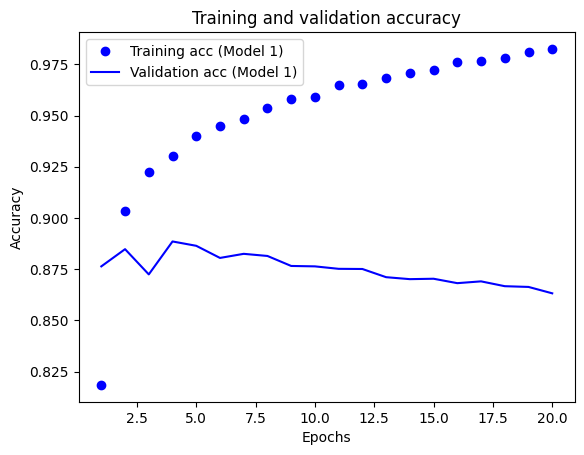



Training Model 2


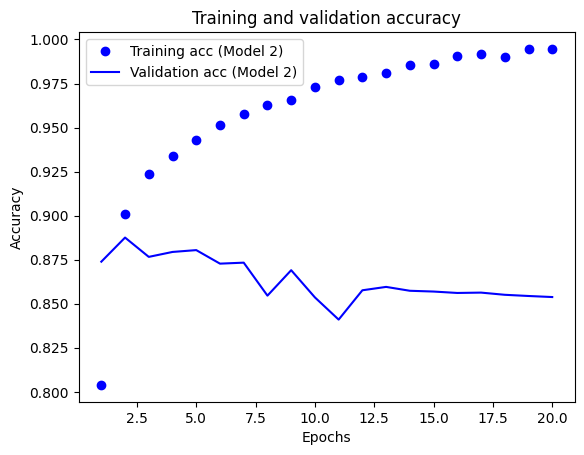



Training Model 3


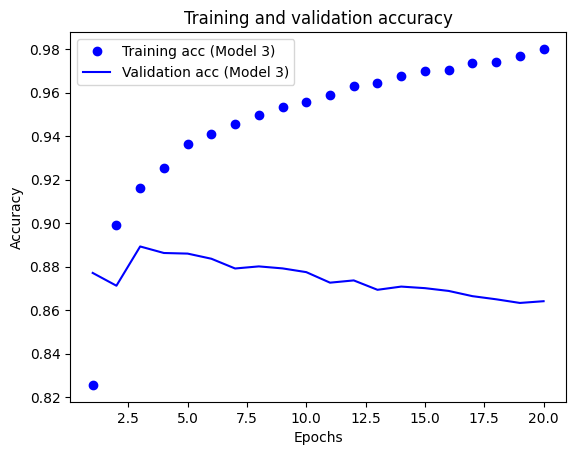



Training Model 4


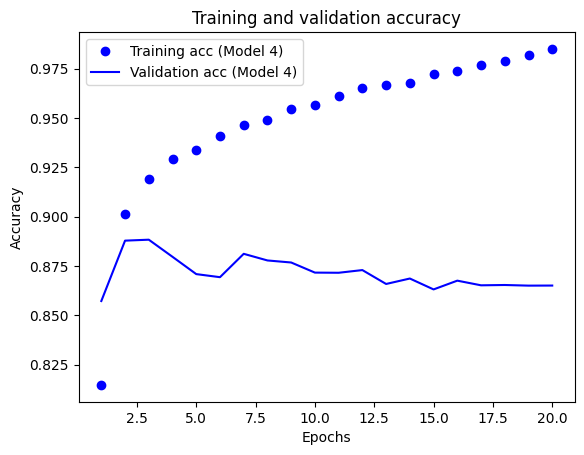



Training Model 5


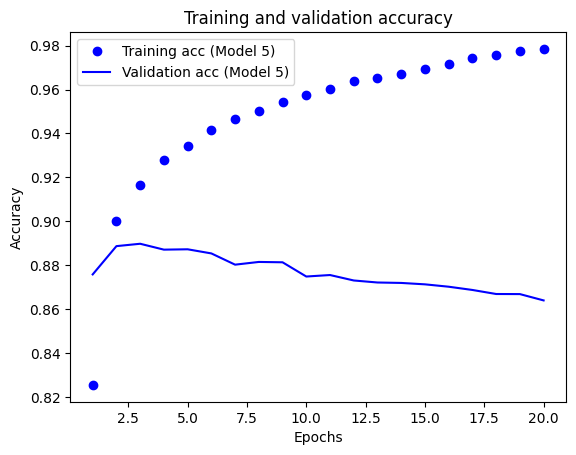



Training Model 6


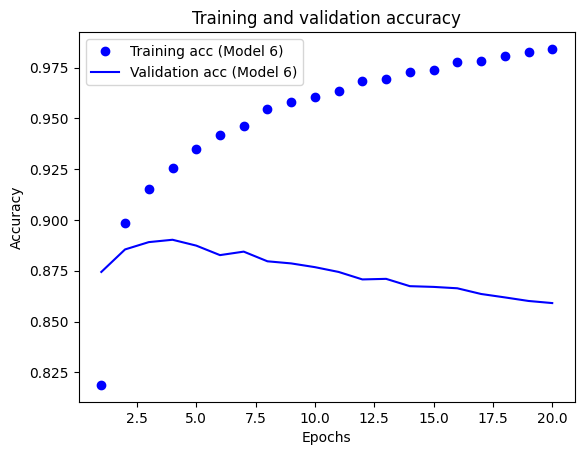



Training Model 7


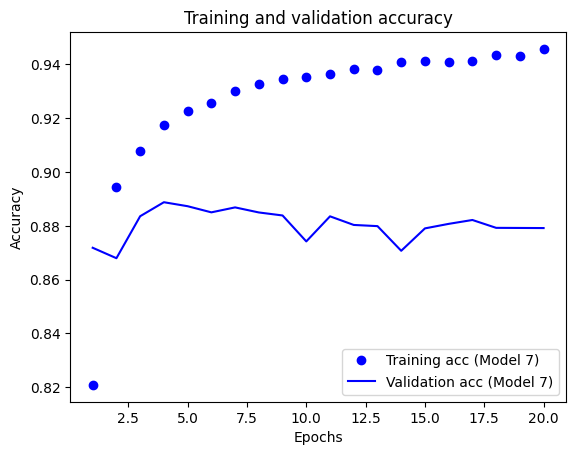



Training Model 8


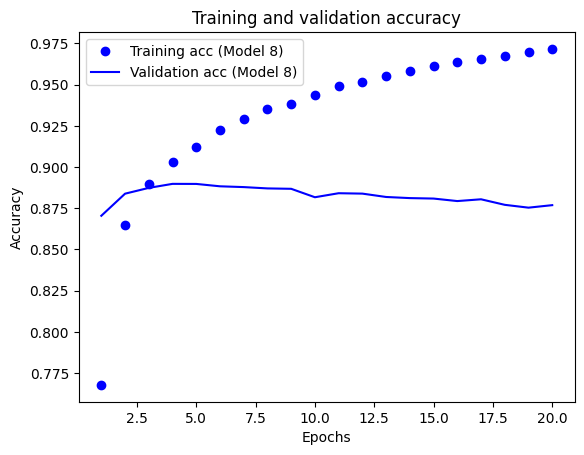

In [ ]:
# List of models
models_list = [model_one_hidden, model_three_hidden, model_32_units, model_64_units,
               model_mse_loss, model_tanh_activation, model_l2_regularization, model_dropout]

# Train and evaluate models
for i, model in enumerate(models_list):
    label = f'Model {i+1}'

    # Train the model
    print(f'\n\nTraining {label}')
    history = compile_and_fit_model(model, x_train, y_train, x_test, y_test)

    # Plot the accuracy
    plot_history(history, label)
